In [ ]:
## @see https://www.kaggle.com/toorkp/churn-wsdm/data

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier

from collections import Counter
from numpy.random import RandomState
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *

In [9]:
base_dataset = pd.read_hdf('/home/dissertation/data/base_abt.h5', 'base_abt')

base_dataset['city'] = base_dataset.city.astype(str)
base_dataset['registered_via'] = base_dataset.registered_via.astype(str)

## Simple Data Prep 
base_dataset = base_dataset.drop(labels =['gender','msno'], axis=1)

## Simply drops records with NA 
base_dataset = clean_dataset(base_dataset)

print(base_dataset.shape)
base_dataset.head()

(858935, 19)


,is_churn,city,bd,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,actual_amount_mean,total_actual_amount,is_auto_renew_mode,transaction_date_min,transaction_date_max,cancel_times
0,1,5,28,3,20131223,2013-12-23,6,31.00,2.00,0.00,10.00,49.67,298.00,149.00,894.00,True,20150331.00,20170228.00,1
1,1,13,20,3,20131223,2013-12-23,5,38.00,3.00,30.00,25.40,125.40,627.00,125.40,627.00,False,20160303.00,20170210.00,0
2,1,13,18,3,20131227,2013-12-27,18,38.00,1.00,30.00,30.00,149.00,2682.00,149.00,2682.00,False,20150819.00,20170130.00,0
3,1,1,0,7,20140109,2014-01-09,19,41.00,2.00,30.00,25.63,125.47,2384.00,141.16,2682.00,True,20150108.00,20160225.00,3
4,1,13,35,7,20140125,2014-01-25,24,41.00,1.00,30.00,26.25,105.38,2529.00,123.17,2956.00,True,20150124.00,20160901.00,2


In [16]:
RANDOM_STATE = 42 
CV_ITER = 3
SCORING_METRIC = None

## Each entry in the list is a Tuple of
##   [ModelName, Model, HyperParams, ScoringMetric]
classifiers = [
    ('NB', GaussianNB(), {}, SCORING_METRIC),
    ('DT', DecisionTreeClassifier(), {}, SCORING_METRIC),
    ('RF', RandomForestClassifier(), {}, SCORING_METRIC),
    ('LR', LogisticRegression(solver = 'liblinear'), {}, SCORING_METRIC),
    ('AB', AdaBoostClassifier(), {}, SCORING_METRIC),
    ('MLP', MLPClassifier(), {}, SCORING_METRIC)
]

In [14]:
all_metrics = pd.DataFrame()
all_metrics

""


### Experiment 1.1 Baseline - Default Settings - No sampling

Model Build Iteration 0
PRE-SAMPLING: (601254, 18) (601254,) Counter({0: 545044, 1: 56210})
POST-SAMPLING: (601254, 18) (601254,) Counter({0: 545044, 1: 56210})
Applying normalisation to train and test sets
Categorical columns in dataset ['city', 'registered_via']
Categorical columns in dataset ['city', 'registered_via']
X_train:  (601254, 40) (601254, 1)
X_test:  (257681, 40) (257681, 1)


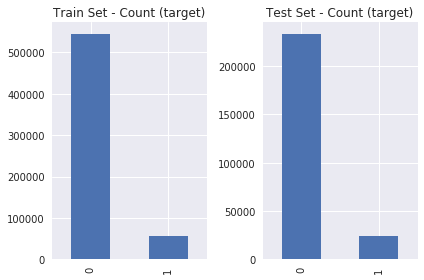

Building NB classifier
No params set, using Standard training
Performing 3-fold CV on test set
P_Recall: 0.425; N_Recall: 0.97
Building DT classifier
No params set, using Standard training
Performing 3-fold CV on test set
P_Recall: 0.471; N_Recall: 0.954
Building RF classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Performing 3-fold CV on test set
P_Recall: 0.43; N_Recall: 0.983
Building LR classifier
No params set, using Standard training
Performing 3-fold CV on test set


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


P_Recall: 0.0; N_Recall: 1.0
Building AB classifier
No params set, using Standard training
Performing 3-fold CV on test set
P_Recall: 0.36; N_Recall: 0.991
Building MLP classifier
No params set, using Standard training
Performing 3-fold CV on test set


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


P_Recall: 0.0; N_Recall: 1.0


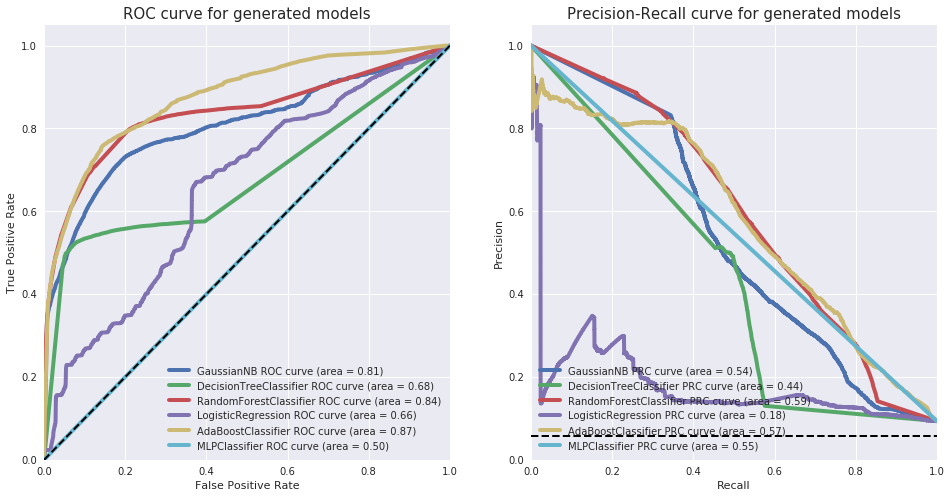

In [17]:
%%time

sampler = ('None', DummySampler())

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

In [19]:
all_metrics.sort_values('f1_score', ascending=False)

,classifier,sampling_method,tn,fn,tp,fp,accuracy,precision,recall,f1_score,log_loss,time_taken,aucroc,auprc,bal_acc,cv_score_mean,cv_score_std,model_churn_cost,sample
0,RandomForestClassifier,None,229556,13725,10365,4035,0.93,0.72,0.43,0.54,2.38,18.05,0.84,0.59,0.71,0.93,0.00,4410375.00,0
0,AdaBoostClassifier,None,231541,15424,8666,2050,0.93,0.81,0.36,0.50,2.34,90.50,0.87,0.57,0.68,0.93,0.00,4608450.00,0
0,GaussianNB,None,226661,13848,10242,6930,0.92,0.60,0.43,0.50,2.79,2.80,0.81,0.54,0.70,0.92,0.00,4576650.00,0
0,DecisionTreeClassifier,None,222823,12753,11337,10768,0.91,0.51,0.47,0.49,3.15,8.92,0.68,0.44,0.71,0.91,0.00,4576925.00,0
0,LogisticRegression,None,233591,24090,0,0,0.91,0.00,0.00,0.00,3.23,4.23,0.66,0.18,0.50,0.91,0.00,6022500.00,0
0,MLPClassifier,None,233591,24090,0,0,0.91,0.00,0.00,0.00,3.23,1225.14,0.50,0.55,0.50,0.91,0.00,6022500.00,0


### Experiment 1.2 Baseline - Default Settings - Oversampled training set 100%

In [ ]:
sampler = ('ROS 1:1', RandomOverSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.3 Baseline - Default Settings - Undersampled training set

In [ ]:
sampler = ('RUS 1:1', RandomUnderSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.4 Baseline - Default Settings - Over sampling - 33% of majority size

In [ ]:
sampler = ('ROS 3:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/3))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.5 Baseline - Default Settings - Over sampling - 66% of majority size

In [ ]:
sampler = ('ROS 3:2', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 2/3))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.6 Baseline - Default Settings - Over sampling - 50% of majority size

In [ ]:
sampler = ('ROS 2:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/2))

exp_metrics = perform_experiment(base_dataset, classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.7 Baseline Default Settings SMOTE-NC

In [ ]:

sampler = ('SMOTE_NC', SMOTENC(random_state=RANDOM_STATE, categorical_features=[0,1,2,3,4,5,6,7,12,13], n_jobs=8))

## Keep the following, essentially dropping the dt columns
cols = ['is_churn', 'city', 'bd', 'registered_via', 'total_order',
       'payment_method_id_mode', 'payment_method_id_count',
       'payment_plan_days_mode', 'payment_plan_days_mean',
       'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean',
       'total_actual_amount', 'is_auto_renew_mode', 'cancel_times']

exp_metrics = perform_experiment(base_dataset[cols], classifiers, sampler, 1, RANDOM_STATE, cv_iter=CV_ITER)

all_metrics = all_metrics.append(exp_metrics)

In [ ]:
all_metrics.sort_values('aucroc', ascending=False).head(15)

In [ ]:
## Just try an SVM 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time
model_train_results = train_model(base_dataset, sampling_method = 'under', classifiers = [('SGDClassifier', SGDClassifier(loss='log'))])

In [ ]:
## Print the feature importance 

feature_index = np.flip(np.argsort(model.feature_importances_), axis=0)
ordered_features = []
column_names = X_test.columns

for i in feature_index[0:10]:
    print(np.round(model.feature_importances_[i], 3), ' --> ', column_names[i])
    ordered_features.append(column_names[i])

In [ ]:
## Print the permutation importance 

import eli5
from eli5.sklearn import PermutationImportance

_, X_test, _, y_test = prepare_train_test_split(model_dataset, 0)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#model_name, model = model_train_results[1][2]

for model_name, model in model_train_results[1]:
    probs = model.predict_proba(X_test)[:, 1]
    pr_data = plot_precision_recall(
        y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
pr_data = plot_roc(
    y_test, probs, title='ROC Curve for {0}'.format(model_name))

In [ ]:
print(plt.style.available)

In [ ]:
model_dataset.head()

In [ ]:
print("Original Data distribution")
print(model_dataset['is_churn'].value_counts())

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
train_downsample = undersampled_dataset(model_dataset, 'is_churn')

print(train_downsample['is_churn'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Up Sampled data set')
train_upsample = oversampled_dataset(model_dataset, 'is_churn')

print(train_upsample['is_churn'].value_counts())
print("Num records = ", train_upsample.shape[0])
train_upsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

In [ ]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.25].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

In [ ]:
threshold_required = 0.5
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [ ]:
model_dataset.head()

In [ ]:
fi = pd.DataFrame({'importance': model.feature_importances_}, index=model_dataset.iloc[:, 1:].columns).\
    sort_values('importance', ascending=False)
fi.head(10)